In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
df = pd.read_csv("AmesHousing.csv")

In [49]:
print(df.head())

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

In [50]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [51]:
print(df.describe())

            Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026      1.111537    30.245361       20.860286    

In [52]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [59]:
df = pd.get_dummies(df, drop_first=True)

In [60]:
features = df.drop('SalePrice', axis=1)
target = df['SalePrice']

In [ ]:
feature = df[['Overall Qual','Year Built', 'Gr Liv Area','Full Bath','TotRms AbvGrd','Garage Area','Total Bsmt SF','Garage Cars','1st Flr SF']]
target = df['SalePrice']

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

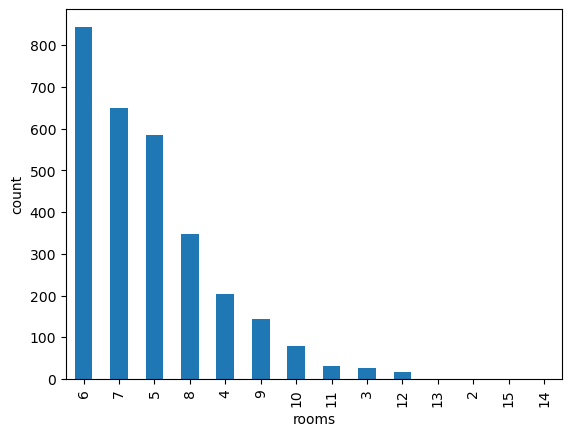

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
df['TotRms AbvGrd'].value_counts().plot(kind='bar')
plt.xlabel('rooms')
plt.ylabel('count')
sns.despine  

In [57]:
lr = LinearRegression()

In [64]:
print(df.isnull().sum())

Order                       0
PID                         0
MS SubClass                 0
Lot Frontage              490
Lot Area                    0
                         ... 
Sale Condition_AdjLand      0
Sale Condition_Alloca       0
Sale Condition_Family       0
Sale Condition_Normal       0
Sale Condition_Partial      0
Length: 263, dtype: int64


In [66]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')


# Impute missing values
features_imputed = imputer.fit_transform(df)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_imputed, target, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(y_pred)


Mean Squared Error: 0.47336483746848673
R^2 Score: 0.9999999999409589
[161000.         116000.         196500.         123600.
 126000.         174190.         200000.         148500.
  88750.         409900.         235000.         246900.
  85500.         145000.          95000.         160500.
 147000.         192500.         124000.         137500.
 198900.         140000.         200000.         192500.
 185000.         306000.         392000.         195000.
 197900.         227680.         185900.          87000.
 201000.         103000.         128500.          75190.
 176485.         274900.         187000.         260000.
 342643.         240000.         263400.         183000.
 120000.         350000.         185750.         155000.
 171500.         125000.         162900.         134500.
 134500.         150000.         213133.         190550.
 180000.         118000.         210900.         133500.
  60000.         144000.          84500.         337500.
 246500.         1

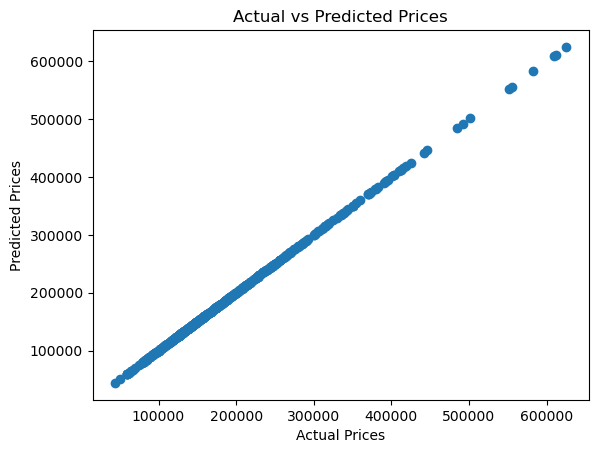

In [67]:
#Linear Regression plot
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [74]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the model
dt = DecisionTreeRegressor(random_state=42)

# Fit the model
dt.fit(X_train_scaled, y_train)

# Make predictions
y_pred = dt.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(y_pred)

Mean Squared Error: 20656605.778156996
R^2 Score: 0.9974235756423077
[161000. 116000. 196500. 123000. 126000. 174000. 199500. 148400.  89000.
 410000. 235000. 246000.  85400. 145000.  94750. 160500. 147000. 193000.
 124000. 137450. 199000. 140000. 200000. 193000. 185000. 305000. 394432.
 195000. 197900. 227875. 186000.  87000. 201000. 103000. 128500.  75500.
 176432. 275000. 187000. 260000. 339750. 240000. 263435. 183000. 120000.
 348000. 186500. 155000. 171500. 125000. 163000. 134500. 134500. 150000.
 213750. 190500. 180000. 118000. 211000. 133500.  61000. 144000.  84500.
 336820. 245500. 185000. 135000. 241500. 150750. 199900. 167300. 190500.
 318061.  80000. 132000. 404000. 158000. 234500. 148000. 180500. 170000.
 119000. 139600. 195000. 285000. 177000. 128000. 141000. 203000. 184900.
 204900.  79000. 137500.  58500. 190000. 177500.  45000. 245000. 216000.
 256300.  97900. 394432. 410000. 405000. 227875. 160000. 285000. 200000.
 165500. 111500. 256300. 123000. 130000. 111250. 226000

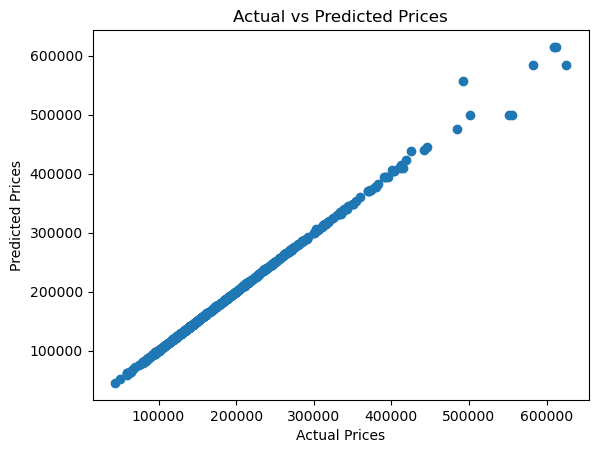

In [75]:
#Gradient Boosting Regressor
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()